In [154]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
import streamlit as st

In [156]:
#Step1= Load Dataset
df = pd.read_csv("Ecommerce_Funnel_Dataset.csv")

In [158]:
df.columns

Index(['SessionID', 'UserID', 'SessionDate', 'Channel', 'Device', 'Country',
       'PagesViewed', 'SessionDuration', 'Bounce', 'ProductViewed',
       'AddedToCart', 'CheckoutStarted', 'PurchaseCompleted', 'Revenue'],
      dtype='object')

In [160]:
df['Orders'] = df['PurchaseCompleted']
df.columns

Index(['SessionID', 'UserID', 'SessionDate', 'Channel', 'Device', 'Country',
       'PagesViewed', 'SessionDuration', 'Bounce', 'ProductViewed',
       'AddedToCart', 'CheckoutStarted', 'PurchaseCompleted', 'Revenue',
       'Orders'],
      dtype='object')

In [162]:
print(df[['PurchaseCompleted', 'Orders']].head(10))


   PurchaseCompleted  Orders
0                  0       0
1                  1       1
2                  0       0
3                  1       1
4                  0       0
5                  1       1
6                  1       1
7                  0       0
8                  0       0
9                  0       0


In [166]:
#Step2= KPI Calculation
total_orders = df['Orders'].sum()
average_order_value = df.loc[df['Orders'] == 1, 'Revenue'].mean()
total_revenue = df['Revenue'].sum()
print("====== KPIs ======")
print(f"Total Orders: {total_orders}")
print(f"Average Order Value: {average_order_value:.2f}")
print(f"Total Revenue: {total_revenue:.2f}")
print("==================")

====== KPIs ======
Total Orders: 276
Average Order Value: 162.81
Total Revenue: 44934.59


In [168]:
added_to_cart = df['AddedToCart'].sum()
print(f"Added to cart: {added_to_cart}")

checkout= df['CheckoutStarted'].sum()
print(f"Checkout: {checkout}")

purchased= df['PurchaseCompleted'].sum()
print(f"Purchased: {purchased}")

Added to cart: 490
Checkout: 344
Purchased: 276


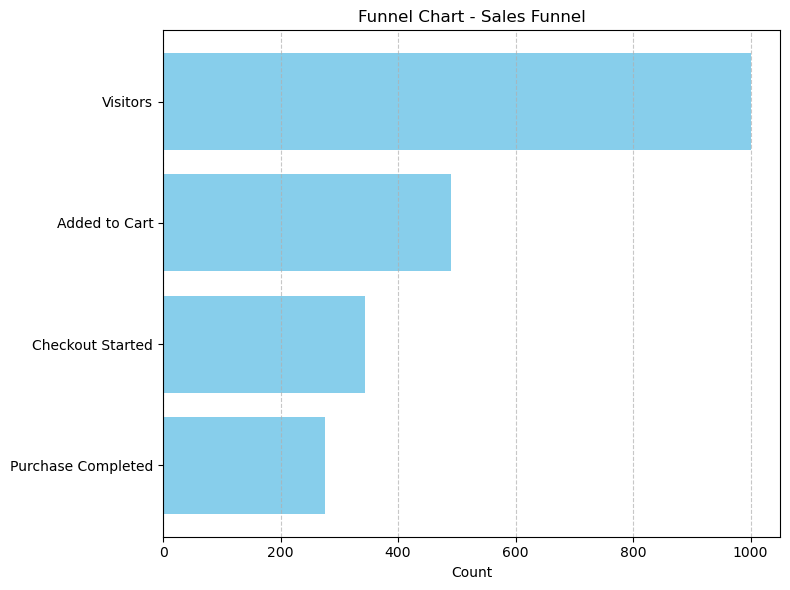

In [170]:
#Step3= "Funnel Visulization"
added_to_cart = df['AddedToCart'].sum()


checkout= df['CheckoutStarted'].sum()


purchased= df['PurchaseCompleted'].sum()

#  funnel data
steps = ["Visitors", "Added to Cart", "Checkout Started", "Purchase Completed"]
values = [1000, added_to_cart, checkout, purchased]

# Reverse for funnel effect (largest on top)
steps = steps[::-1]
values = values[::-1]

# Plot
plt.figure(figsize=(8, 6))
plt.barh(steps, values, color='skyblue')
plt.xlabel("Count")
plt.title("Funnel Chart - Sales Funnel")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


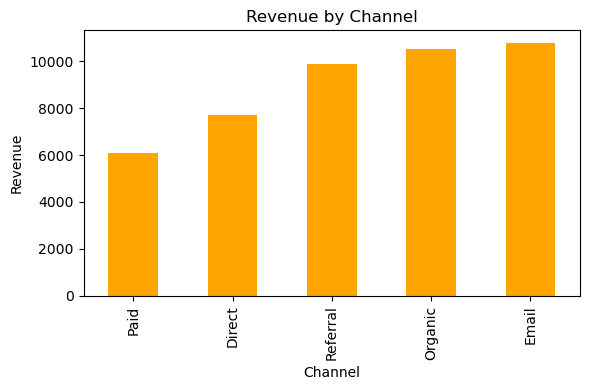

In [172]:
#Step4= "Revenue by Channel"
category_sales = df.groupby('Channel')['Revenue'].sum().sort_values()

plt.figure(figsize=(6, 4))
category_sales.plot(kind='bar', color='orange')
plt.title('Revenue by Channel')
plt.ylabel('Revenue')
plt.xlabel('Channel')
plt.tight_layout()
plt.show()

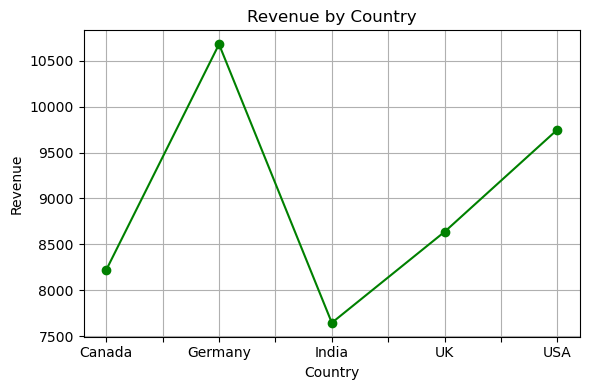

In [174]:

revenue_by_country= df.groupby('Country')['Revenue'].sum()
plt.figure(figsize= (6,4))

monthly_sales.plot(kind='line', marker= 'o', color='green')
plt.title('Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()